# Tópicos en Data Science - UDD 2021
## Leyes de Potencia


#### Cristian Candia-Castro Vallejos, Ph.D.$^{1,2}$

- [1] Data Science Institute (IDS), Universidad del Desarrollo,Chile
- [2] Northwestern Institute on Complex Systems, Kellogg School of Management, Northwestern Unviersity, USA



Referencias:
Descargar artiículo https://arxiv.org/pdf/1305.0215.pdf


## Paquetes

In [ ]:
# !pip install powerlaw

In [2]:
import powerlaw #INSTALLAR usando pip
print(powerlaw.__version__)

1.5


In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import pylab
pylab.rcParams['xtick.major.pad']='8'
pylab.rcParams['ytick.major.pad']='8'
#pylab.rcParams['font.sans-serif']='Arial'

from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=10.0)
rc('text', usetex=False)


from matplotlib.font_manager import FontProperties

panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(12.0)
panel_label_font.set_family("sans-serif")

## Cargando data (repositorios online)

In [7]:
from os import listdir
files = listdir('.')
if 'blackouts.txt' not in files:
    import urllib
    urllib.urlretrieve('https://raw.github.com/jeffalstott/powerlaw/master/manuscript/blackouts.txt', 'blackouts.txt')
if 'words.txt' not in files:
    import urllib
    urllib.urlretrieve('https://raw.github.com/jeffalstott/powerlaw/master/manuscript/words.txt', 'words.txt')
if 'worm.txt' not in files:
    import urllib
    urllib.urlretrieve('https://raw.github.com/jeffalstott/powerlaw/master/manuscript/worm.txt', 'worm.txt')


In [8]:
from numpy import genfromtxt
#Cargando data
blackouts = genfromtxt('blackouts.txt')#/10**3
words = genfromtxt('words.txt')
worm = genfromtxt('worm.txt')
worm = worm[worm>0]

El primer conjunto de datos mejor ajustado es quizás el más conocido y sólido de todos las ditribuciones de leyes de potencia: la frecuencia de uso de las palabras en el idioma inglés. Los datos específicos utilizados son las frecuencias del uso de las palabras en la novela de Herman Melville "Moby Dick".

El segundo, moderadamente apropiado conjunto de datos es el número de conexiones que tiene cada neurona en el gusano nematodo C. elegans.

El último, los datos inadecuados son el número de personas afectadas por apagones en los Estados Unidos entre 1984 y 2002.

In [9]:
def plot_basics(data, data_inst, fig, units):
    from powerlaw import plot_pdf, Fit, pdf
    annotate_coord = (-.4, .95)
    ax1 = fig.add_subplot(n_graphs,n_data,data_inst)
    x, y = pdf(data, linear_bins=True)
    ind = y>0
    y = y[ind]
    x = x[:-1]
    x = x[ind]
    ax1.scatter(x, y, color='r', s=.5)
    plot_pdf(data[data>0], ax=ax1, color='b', linewidth=2)
    from pylab import setp
    setp( ax1.get_xticklabels(), visible=False)

    if data_inst==1:
        ax1.annotate("A", annotate_coord, xycoords="axes fraction", fontproperties=panel_label_font)

    
    from mpl_toolkits.axes_grid.inset_locator import inset_axes
    ax1in = inset_axes(ax1, width = "30%", height = "30%", loc=3)
    ax1in.hist(data,  color='b')#normed=True,
    ax1in.set_xticks([])
    ax1in.set_yticks([])

    
    ax2 = fig.add_subplot(n_graphs,n_data,n_data+data_inst, sharex=ax1)
    plot_pdf(data, ax=ax2, color='b', linewidth=2)
    fit = Fit(data, xmin=1, discrete=True)
    fit.power_law.plot_pdf(ax=ax2, linestyle=':', color='g')
    p = fit.power_law.pdf()

    ax2.set_xlim(ax1.get_xlim())
    
    fit = Fit(data, discrete=True)
    fit.power_law.plot_pdf(ax=ax2, linestyle='--', color='g')
    from pylab import setp
    setp( ax2.get_xticklabels(), visible=False)

    if data_inst==1:
       ax2.annotate("B", annotate_coord, xycoords="axes fraction", fontproperties=panel_label_font)        
       ax2.set_ylabel(u"p(X)")# (10^n)")
        
    ax3 = fig.add_subplot(n_graphs,n_data,n_data*2+data_inst)#, sharex=ax1)#, sharey=ax2)
    fit.power_law.plot_pdf(ax=ax3, linestyle='--', color='g')
    fit.exponential.plot_pdf(ax=ax3, linestyle='--', color='r')
    fit.plot_pdf(ax=ax3, color='b', linewidth=2)
    
    ax3.set_ylim(ax2.get_ylim())
    ax3.set_xlim(ax1.get_xlim())
    
    if data_inst==1:
        ax3.annotate("C", annotate_coord, xycoords="axes fraction", fontproperties=panel_label_font)

    ax3.set_xlabel(units)

## Figura 1

/Users/crcandia/anaconda3/envs/work_candia/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


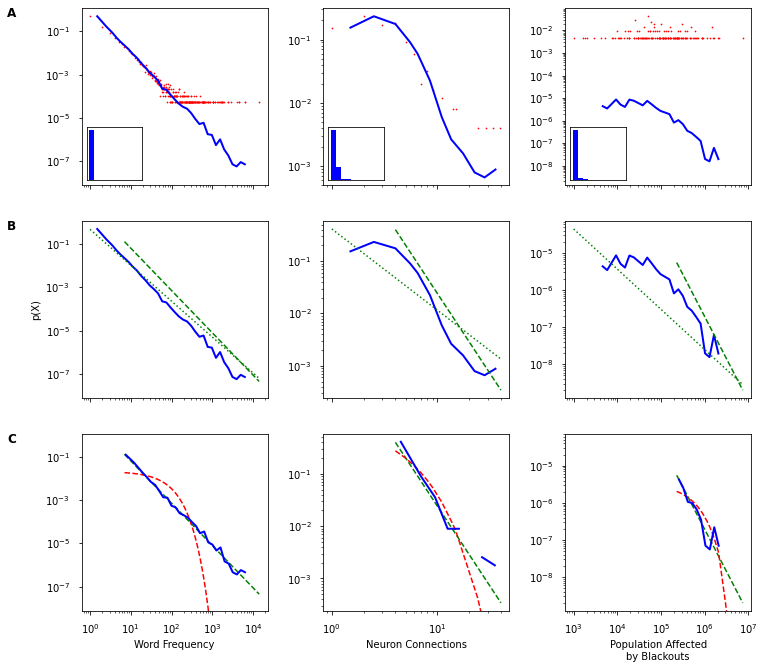

In [10]:
n_data = 3
n_graphs = 4
f = figure(figsize=(12,15))

data = words
data_inst = 1
units = 'Word Frequency'
plot_basics(data, data_inst, f, units)

data_inst = 2
#data = city
#units = 'City Population'
data = worm
units = 'Neuron Connections'
plot_basics(data, data_inst, f, units)

data = blackouts
data_inst = 3
units = 'Population Affected\nby Blackouts'
plot_basics(data, data_inst, f, units)

f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.3, hspace=.2)
figname = 'FigWorkflow'
f.savefig(figname+'.eps', bbox_inches='tight')
#f.savefig(figname+'.tiff', bbox_inches='tight', dpi=300)

Linea punteada representa con xmin de 1.

Linea segmentada representa un xmin estimado


#### Pasos básicos de análisis para distribuciones de cola pesada: visualización, ajuste y comparación.

Los datos de ejemplo para el ajuste de la ley de potencia son: buen ajuste (columna izquierda), ajuste medio (centro columna) y mal ajuste (columna derecha).

    a) Visualizando datos con funciones de densidad de probabilidad. Un histograma típico en ejes lineales (recuadros) no es útil para visualizar distribuciones de cola pesada. En los ejes log-log, es necesario utilizar contenedores (bins) espaciados logarítmicamente para representar datos (linea azul). Los contenedores espaciados linealmente (línea roja) ocultan la cola de la distribución (ver paper).

    b) Ajuste a la cola de la distribución. El mejor ajuste de ley de potencia solo puede cubrir una parte de la cola de la distribución. Línea verde punteada: la ley de potencia se ajusta a partir de  xmin=1 . Línea verde discontinua: ley de potencia ajuste desde el  $x_{min}$  óptimo (consulte Métodos básicos: Identificación del rango de escala).

    c) Comparando la bondad del ajuste. Una vez que se establece el mejor ajuste a una ley de potencia, la comparación con otras posibles distribuciones son necesarias. Línea verde discontinua: ajuste de la ley de potencia a partir del  $x_{min}$  óptimo. Línea roja punteado: ajuste exponencial a partir del mismo $x_{min}$.

In [17]:
blackouts = blackouts/10**3


# Introducción

In [11]:
data = blackouts
####
import powerlaw
fit = powerlaw.Fit(data)
fit.power_law.alpha
fit.power_law.sigma

fit.distribution_compare('power_law', 'exponential')

Calculating best minimal value for power law fit


(12.7545626758821, 0.15229255604426487)

In [12]:
data = words
####
import powerlaw
fit = powerlaw.Fit(data)
fit.power_law.alpha
fit.power_law.sigma
fit.distribution_compare('power_law', 'exponential')


Calculating best minimal value for power law fit


(3809.7804237111686, 2.753965722517646e-23)

In [13]:
data = worm
####
import powerlaw
fit = powerlaw.Fit(data)
fit.power_law.alpha
fit.power_law.sigma
fit.distribution_compare('power_law', 'exponential')

Calculating best minimal value for power law fit


(16.601134166691274, 0.0005788608926042935)

Devuelve el log-likelihood* ratio, y su valor  p , entre los dos ajustes de distribución, asumiendo que las distribuciones candidatas están anidadas.

Si es mayor que 0, se prefiere la primera distribución. Si es menor que 0, se prefiere la segunda distribución.

*El likelihood cuantifica qué tan bueno es un modelo, dado un conjunto de datos que se han observado.

## Basic Methods
## Visualization
#### PDF Linear vs Logarithmic Bins


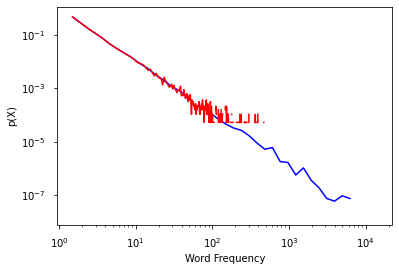

In [14]:
data = words
####
figPDF = powerlaw.plot_pdf(data, color='b')
powerlaw.plot_pdf(data, linear_bins=True, color='r', ax=figPDF)
####
figPDF.set_ylabel("p(X)")
figPDF.set_xlabel(r"Word Frequency")
figname = 'FigPDF'
savefig(figname+'.eps', bbox_inches='tight')
#savefig(figname+'.tiff', bbox_inches='tight', dpi=300)

Las PDF requieren bining en los datos, y al presentar una PDF en ejes logarítmicos, los contenedores deben tener espaciado logarítmico (anchos exponencialmente crecientes).

Aunque los contenedores lineales mantienen una alta resolución en todo el rango de valores, la probabilidad muy reducida de observar valores grandes en las distribuciones dificulta una estimación confiable de su probabilidad de ocurrencia.

Esto se compensa utilizando bins logarítmicos, lo que aumenta la probabilidad de observar un rango de valores en la cola de la distribución y normalizando apropiadamente para ese aumento en el ancho del contenedor.

## Figura 2

Calculating best minimal value for power law fit


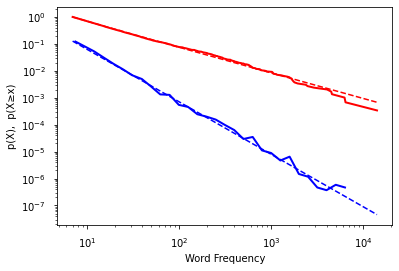

In [15]:
data = words
fit = powerlaw.Fit(data, discrete=True)
####
figCCDF = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=figCCDF)
fit.plot_ccdf(color='r', linewidth=2, ax=figCCDF)
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=figCCDF)
####
figCCDF.set_ylabel(u"p(X),  p(X≥x)")
figCCDF.set_xlabel(r"Word Frequency")

figname = 'FigCCDF'
savefig(figname+'.eps', bbox_inches='tight')
#savefig(figname+'.tiff', bbox_inches='tight', dpi=300)

Otra forma de extraer información sobre la cola de la distribución es usando la Distribución acumulada complementaria, donde: 

$p_k  = \sum\limits_{q = k + 1}^\infty  {p_q }$

Donde si $p_k$ sigue una ley de potencia: $p_k  \sim k^{ - \gamma }$, se cumple que:

$CDF(k) \sim k^{ - \gamma  + 1}$


Función de densidad de probabilidad $(p (X)$, azul) y

Función de distribución acumulativa complementaria $(p (X ≥ x)$, roja) de las frecuencias de palabras de "Moby Dick".

$CCDF=(1−CDF(x))$

In [18]:
data = blackouts
fit = powerlaw.Fit(data)
###
x, y = fit.cdf()
bin_edges, probability = fit.pdf()
y = fit.lognormal.cdf(data=[300,350])
y = fit.lognormal.pdf()

Calculating best minimal value for power law fit


## Identificando el rango de escalamiento (de la ley de potencia)

El primer paso para ajustar una ley de potencia es determinar en qué parte de los datos se ajustará una cola pesada.

Una característica interesante de la distribución es la cola pesada son su cola y sus propiedades, por lo que si los valores iniciales, pequeños de los datos no siguen una distribución de ley de potencia, el usuario puede optar por ignorar dichos datos.

La pregunta es de que valor mínimo xmin comienza la relación de escala de la ley de potencia?. Los métodos de [5] (ver paper) encuentran este óptimo, el valor de xmin, al crear un ajuste de ley de potencia a partir de cada valor único en el conjunto de datos, luego seleccionando el que resulta en la distancia mínima de Kolmogorov-Smirnov, D, entre los datos y el ajuste.

Si el usuario no proporciona un valor para xmin, Powerlaw calcula el valor óptimo cuando el objeto Fit se crea por primera vez. Como las leyes de potencia no están definidas para x = 0, debe haber algún valor mínimo. Por lo tanto, incluso si un determinado conjunto de datos trae consigo un razonamiento específico del dominio de que los datos deben seguir una ley de potencia en todo su rango, el usuario todavía debe dictar un xmin. Esto podría ser un mínimo teórico, un umbral de ruido, o el valor mínimo observado en los datos. La Figura 1B visualiza la diferencia de ajuste entre la asignación xmin = 1 y encontrar el xmin óptimo minimizando D

In [19]:
data = blackouts
####
import powerlaw
fit = powerlaw.Fit(data)

print(':')
print(fit.xmin)
print(fit.fixed_xmin)
print(fit.alpha)
print(fit.D)

print('---------')

fit = powerlaw.Fit(data, xmin=1.0)
print(fit.xmin)
print(fit.fixed_xmin)
print(fit.alpha)
print(fit.D)


Calculating best minimal value for power law fit
:min progress: 99%
230.0
False
2.272637219830288
0.0606737962944387
---------
1.0
True
1.220176593367261
0.37601504850371725


In [24]:
data = blackouts
####
fit = powerlaw.Fit(data, xmin=(250.0, 300.0))
fit.fixed_xmin
fit.given_xmin
fit.xmin


Calculating best minimal value for power law fit


272.0

Un límite superior también podría deberse a la escala de tamaño finito, en la que los datos observados provienen de una pequeña subsección de un sistema más grande.

El tamaño finito de la ventana de observación significaría que los puntos de datos individuales no podrían ser más grandes que dicha ventana, xmax, aunque el sistema mayor tendría datos más grandes, no observados (por ejemplo, en neurociencia, grabados desde un trozo de corteza vs todo el cerebro).

Los efectos de tamaño finito se pueden probar variando experimentalmente el tamaño de la ventana de observación (y xmax) y determinando si los datos siguen una ley de potencia con el nuevo xmax [3, 4] (ver paper). La presencia de un límite superior se basa en la naturaleza de los datos y el contexto en el que se recopilaron, por lo que solo puede ser dictada por el usuario. Cualquier dato por encima de xmax se ignora para el ajuste.

In [25]:
data = blackouts
fit = powerlaw.Fit(data)
print(':')
print(fit.xmax)
print(fit.fixed_xmax)
####
fit = powerlaw.Fit(data, xmax=10000.0)
print(':')
print(fit.xmax)
print(fit.fixed_xmax)


Calculating best minimal value for power law fit
:min progress: 99%
None
False
Calculating best minimal value for power law fit
:min progress: 99%
10000.0
True


# Figura 3

Para calcular o trazar CDF, CCDF y PDF, de forma predeterminada, los objetos Fit solo usan datos por encima de xmin y por debajo de xmax (si están presentes).

Los comandos de ploteo del objeto Fit pueden trazar todos los datos que se le dieron originalmente con el key original_data = True. Los objetos Distribution constituyentes solo se definen dentro del rango de xmin y xmax, pero pueden plotear cualquier subconjunto de ese rango pasando datos específicos con el key data.

Cuando se utiliza un xmax, el CDF y el CCDF de una ley de potencia no muestran una línea recta en un gráfico log-log, sino que se inclinan hacia abajo cuando se acercan al xmax (Figura 3). La PDF, en contraste, aparece como una línea recta en todo el rango hasta xmax. Debido a esta diferencia, las PDF son preferibles cuando se visualizan datos con un xmax, a fin de no oscurecer la escala.

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
xmin progress: 93%

/Users/crcandia/anaconda3/envs/work_candia/lib/python3.7/site-packages/powerlaw.py:1195: RuntimeWarning: divide by zero encountered in double_scalars
  C = 1.0/C
/Users/crcandia/anaconda3/envs/work_candia/lib/python3.7/site-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


/Users/crcandia/anaconda3/envs/work_candia/lib/python3.7/site-packages/powerlaw.py:840: RuntimeWarning: invalid value encountered in multiply
  likelihoods = f*C


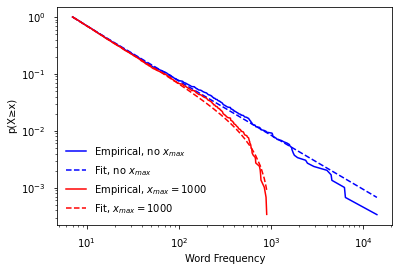

In [60]:
data = words
#FigCCDFmax = powerlaw.plot_ccdf(data, linewidth=3)
fit = powerlaw.Fit(data, discrete=True, xmax=None)
FigCCDFmax = fit.plot_ccdf(color='b', label=r"Empirical, no $x_{max}$")
fit.power_law.plot_ccdf(color='b', linestyle='--', ax=FigCCDFmax, label=r"Fit, no $x_{max}$")


fit = powerlaw.Fit(data, discrete=True, xmax=1000)
fit.plot_ccdf(color='r', label=r"Empirical, $x_{max}=1000$")
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=FigCCDFmax, label=r"Fit, $x_{max}=1000$")

#x, y = powerlaw.ccdf(data, xmax=max(data))
#fig1.plot(x,y)
####
#FigCCDFmax.set_ylabel(r"$p(X\geq x)$")
FigCCDFmax.set_ylabel(u"p(X≥x)")
FigCCDFmax.set_xlabel(r"Word Frequency")
handles, labels = FigCCDFmax.get_legend_handles_labels()
leg = FigCCDFmax.legend(handles, labels, loc=3)
leg.draw_frame(False)

figname = 'FigCCDFmax'
savefig(figname+'.eps', bbox_inches='tight')
#savefig(figname+'.tiff', bbox_inches='tight', dpi=300)
